In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy import optimize

In [2]:
alpha_count = np.fromstring(
"""0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 2 10 6 2 0 1 2 1 5 4 4 6 13 2 8 4 39
0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 2 1 0 0 0 1 1 0 6 4 1 4 6 2 1 1 4
0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 6 2 0 0 2 2 2 0 11 1 4 1 3 2 0 4 6
0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 8 1 3 1 6 1 1 1 10 1 0 2 4 2 1 3 10
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 6 2 1 5 3 6 5 7 4 2 1 7 1 0 0 3
0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 5 6 10 8 4 6 10 5 12 3 3 6 5 2 3 3 8
0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 3 7 15 13 9 12 7 19 5 20 4 8 0 5 0 2 1 6
0 0 0 0 0 0 0 0 0 0 1 3 1 1 0 2 10 31 24 31 35 40 49 27 28 5 4 0 6 4 3 0 3
1 0 0 0 0 0 0 2 1 2 0 6 7 8 9 20 11 256 114 106 137 139 145 53 130 12 20 7 20 3 2 1 19
0 0 0 0 0 1 1 0 1 4 2 8 9 11 14 9 27 221 129 132 178 131 133 89 46 10 9 6 7 0 2 1 5
0 0 1 0 1 2 0 2 4 5 15 27 41 43 55 98 76 607 404 322 425 267 231 58 73 13 9 6 14 3 6 3 26
1 2 0 4 0 2 8 1 6 21 67 166 278 264 411 833 885 3828 2458 1995 1660 991 460 166 241 62 36 25 69 14 21 28 99
1 1 1 1 4 3 4 9 22 23 85 519 848 1333 3047 6885 10025 26613 14710 9168 7352 2787 1875 700 983 229 234 149 287 68 109 90 545
0 0 0 1 2 2 1 7 20 35 129 657 1115 2357 6676 18150 74865 48767 26403 13385 5645 2029 1211 574 777 167 172 107 190 67 90 72 226
2 1 1 0 5 0 6 4 32 61 179 977 1778 3674 10733 35138 257002 159927 67556 16543 6952 2376 1806 600 1043 201 220 132 296 66 66 83 246
0 0 3 0 4 3 3 8 35 74 280 1580 2862 5557 15656 57386 473807 275457 47756 10170 4509 1531 986 379 831 161 148 100 226 42 37 42 181
0 2 1 1 0 2 8 8 15 29 106 927 1994 9079 39318 111804 0 20602 3783 631 193 74 41 27 6 4 4 0 3 0 3 1 1
11 3 3 7 9 14 16 24 153 155 663 5212 13596 20472 71307 170972 44787 6438 2113 886 336 151 79 32 31 9 15 18 20 7 21 21 18
9 4 2 6 5 13 16 27 110 119 500 2814 6223 9855 35961 39786 9892 2985 1033 324 190 131 65 37 25 9 5 4 4 5 4 5 5
5 3 3 5 9 7 16 30 94 112 258 1421 2962 5655 10713 9063 1983 1279 435 153 91 58 23 14 9 2 6 2 5 3 2 3 5
6 4 6 3 5 12 12 21 75 106 236 1078 2685 2855 4566 3220 549 588 217 69 40 24 19 7 7 3 4 5 2 1 2 4 1
7 1 5 5 2 8 6 18 48 62 122 723 1090 1111 1303 910 170 360 100 30 22 24 13 9 5 3 1 0 3 1 2 2 0
12 2 1 3 2 9 13 16 52 46 127 526 849 564 736 503 66 157 47 24 9 15 13 8 6 1 1 3 3 1 0 2 0
3 1 5 3 2 3 8 7 25 26 33 253 316 181 217 151 38 63 31 5 5 5 5 4 6 1 3 4 2 0 0 1 0
9 4 7 6 7 8 7 15 57 25 64 328 500 279 402 288 7 77 15 10 7 6 4 0 4 1 2 3 4 2 1 0 1
3 4 0 1 1 1 5 4 7 5 17 84 92 43 46 41 3 28 15 4 4 4 3 4 1 3 1 1 0 0 0 2 3
6 5 3 4 2 1 3 6 20 8 20 98 70 38 52 33 5 17 8 5 0 4 2 1 4 0 2 0 2 0 1 0 1
5 2 1 2 1 7 1 1 13 4 14 54 65 37 37 24 3 11 9 5 8 1 4 5 2 1 1 1 0 0 0 0 0
10 4 3 4 5 3 1 1 17 8 23 85 108 55 74 87 2 24 19 6 2 2 3 2 1 2 0 1 1 0 0 2 1
3 1 2 1 1 0 0 2 7 2 6 19 20 6 12 7 4 6 6 2 0 4 0 0 0 0 0 0 0 0 0 0 0
5 2 2 0 1 1 1 1 2 4 3 23 21 11 24 12 3 10 9 2 4 1 2 1 3 2 2 0 0 0 1 0 0
0 2 1 1 0 2 2 1 7 3 2 20 25 10 15 14 0 15 14 7 9 4 4 3 2 0 0 1 3 0 0 0 1
28 6 5 8 10 4 8 3 15 4 14 75 127 47 105 156 1 18 33 8 5 7 9 5 7 3 5 2 0 0 0 0 1""",
sep=' ', dtype=int).reshape((33,33))

(0.88248578196547089, 0.0)

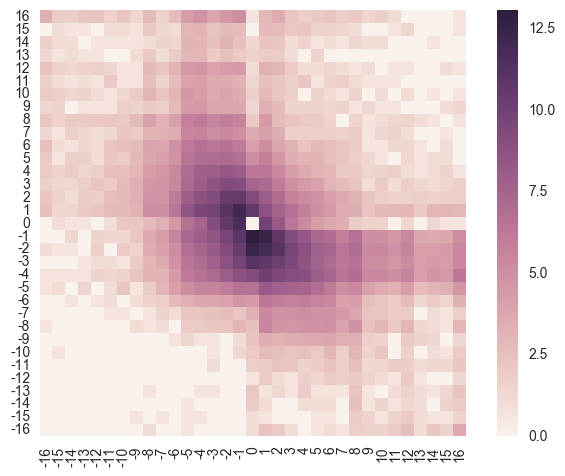

In [3]:
log1p_counts = pd.DataFrame(np.log1p(alpha_count), index=range(-16, 17), columns=range(-16, 17))
sns.heatmap(log1p_counts[::-1], square=True);
alpha_symm = (alpha_count + alpha_count.T) * .5
stats.pearsonr(alpha_count.ravel(), alpha_symm.ravel())

In [4]:
alpha_norm = alpha_count.astype(float)
alpha_norm[:16,:16] /= alpha_norm[:16,:16].sum()
alpha_norm[17:,:16] /= alpha_norm[17:,:16].sum()
alpha_norm[:16,17:] /= alpha_norm[:16,17:].sum()
alpha_norm[17:,17:] /= alpha_norm[17:,17:].sum()
alpha_norm[:16,16] /= alpha_norm[:16,16].sum()
alpha_norm[17:,16] /= alpha_norm[17:,16].sum()
alpha_norm[16,:16] /= alpha_norm[16,:16].sum()
alpha_norm[16,17:] /= alpha_norm[16,17:].sum()
alpha_norm *= alpha_count.sum()

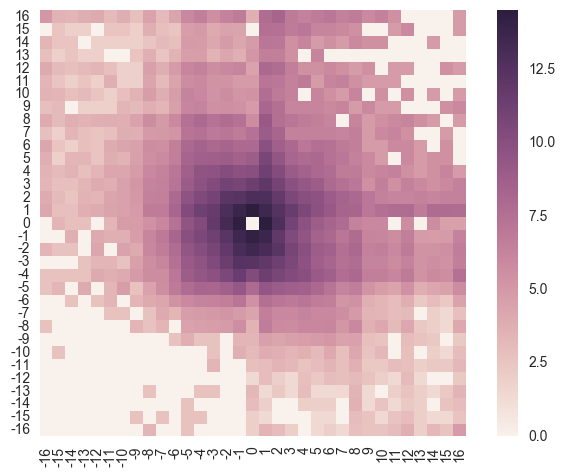

In [5]:
log1p_norm = pd.DataFrame(np.log1p(alpha_norm), index=range(-16, 17), columns=range(-16, 17))
sns.heatmap(log1p_norm[::-1], square=True);

(0.99622640408685015, 0.0)

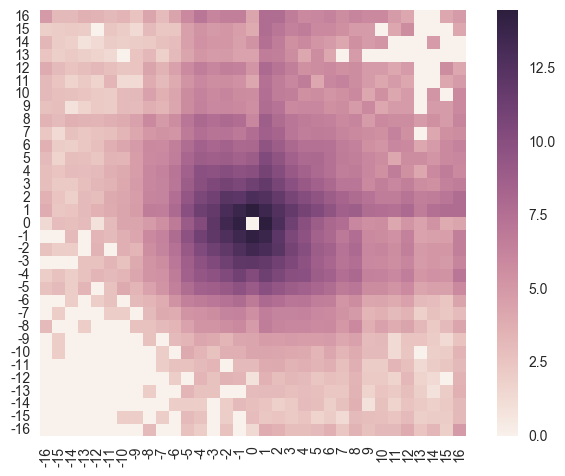

In [6]:
alpha_norm_symm = (alpha_norm + alpha_norm.T) * .5
log1p_norm_symm = pd.DataFrame(np.log1p(alpha_norm_symm), index=range(-16, 17), columns=range(-16, 17))
sns.heatmap(log1p_norm_symm[::-1], square=True);
stats.pearsonr(alpha_norm.ravel(), alpha_norm_symm.ravel())

(0.99918315070893993, 0.0)

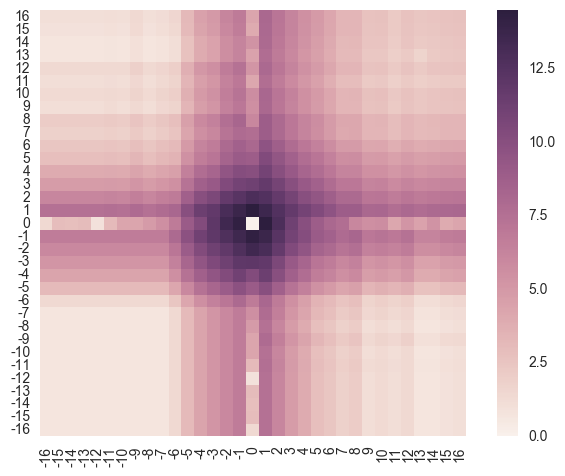

In [7]:
ones_16x16 = np.ones((16, 16))
t = alpha_norm_symm.copy()
for quadrant in [t[:16, :16], t[17:, :16], t[:16, 17:], t[17:, 17:]]:
    def cost_t(x):
        x = x.clip(1)
        v = (x[:16] * ones_16x16).T * x[16:]
        return ((quadrant - v)**2).sum()
    x0 = np.hstack((quadrant.mean(axis=1), quadrant.mean(axis=0)))
    x0 *= np.sqrt(quadrant.sum() / ((x0[:16] * ones_16x16).T * x0[16:]).sum())
    x0 = optimize.fmin(cost_t, x0, maxfun=100000, disp=False).clip(1)
    quadrant[:, :] = (x0[:16] * ones_16x16).T * x0[16:]
alpha_norm_symm_1d = (t + t.T) * .5
log1p_1d = pd.DataFrame(np.log1p(alpha_norm_symm_1d), index=range(-16, 17), columns=range(-16, 17))
sns.heatmap(log1p_1d[::-1], square=True)
stats.pearsonr(alpha_norm_symm.ravel(), alpha_norm_symm_1d.ravel())

In [8]:
alpha_model = alpha_norm_symm_1d.copy()
alpha_model[:16,:16] *= alpha_count[:16,:16].sum() / alpha_norm[:16,:16].sum()
alpha_model[17:,:16] *= alpha_count[17:,:16].sum() / alpha_norm[17:,:16].sum()
alpha_model[:16,17:] *= alpha_count[:16,17:].sum() / alpha_norm[:16,17:].sum()
alpha_model[17:,17:] *= alpha_count[17:,17:].sum() / alpha_norm[17:,17:].sum()
alpha_model[:16,16] *= alpha_count[:16,16].sum() / alpha_norm[:16,16].sum()
alpha_model[17:,16] *= alpha_count[17:,16].sum() / alpha_norm[17:,16].sum()
alpha_model[16,:16] *= alpha_count[16,:16].sum() / alpha_norm[16,:16].sum()
alpha_model[16,17:] *= alpha_count[16,17:].sum() / alpha_norm[16,17:].sum()

(0.99367348329305583, 0.0)

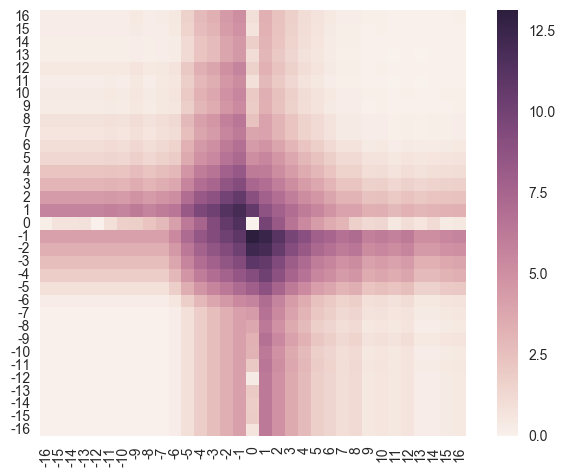

In [9]:
log1p_model = pd.DataFrame(np.log1p(alpha_model), index=range(-16, 17), columns=range(-16, 17))
sns.heatmap(log1p_model[::-1], square=True);
stats.pearsonr(alpha_count.ravel(), alpha_model.ravel())